# Analyse survey

## Imports

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 13:02:17 2018

@author: macchini
"""

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import my_plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils

from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

## Load file and create dataframe

In [15]:
folder = './Data'

files = os.listdir(folder)

surveys = [x for x in files if '.csv' in x]
print(surveys)

csv = surveys[3]

['Bidirectional Interface - haptics.csv', 'Bidirectional Interface - learning.csv', 'NASA_TLX_haptics_1.csv', 'NASA_TLX_learn.csv']


In [16]:
answers_df = pd.read_csv(os.path.join(folder, csv))

# Separate hardware and simulation experiments
answers_df_hw = answers_df[answers_df['subject number'] >= 100]
answers_df = answers_df[answers_df['subject number'] < 100]
answers_df

,Horodateur,subject number,Run,Interface,How mentally demanding was the test?,How physically demanding was the test?,How hurried or rushed was the pace of the task?,How successful were you in accomplishing what you were asked to do?,"How insecure, discouraged, irritated, stresses, and annoyed were you?"
0,2019/08/12 12:15:23 PM UTC+2,1,First,Remote,3,1,3,3,2
1,2019/08/12 12:15:39 PM UTC+2,1,Last,Remote,2,1,2,4,1
2,2019/08/12 12:15:56 PM UTC+2,1,First,Motion,2,2,1,2,3
3,2019/08/12 12:16:15 PM UTC+2,1,Last,Motion,1,1,1,4,1
4,2019/08/12 12:16:33 PM UTC+2,2,First,Remote,3,1,2,3,2
5,2019/08/12 12:16:47 PM UTC+2,2,Last,Remote,2,1,2,4,1
6,2019/08/12 12:17:09 PM UTC+2,2,First,Motion,3,1,2,3,1
7,2019/08/12 12:17:26 PM UTC+2,2,Last,Motion,2,1,1,4,1
8,2019/08/12 12:17:53 PM UTC+2,3,First,Motion,2,1,3,3,1
9,2019/08/12 12:18:10 PM UTC+2,3,Last,Motion,2,1,3,4,1


## Separate dataframe depending on interface/run

In [17]:
types = ['remote-first', 'remote-last', 'motion-first', 'motion-last']

# Separate answers depending on interface and run
answers = {}
answers[types[0]] = answers_df[answers_df['Interface'] == 'Remote']
answers[types[0]] = answers[types[0]][answers[types[0]]['Run'] == 'First']
answers[types[1]] = answers_df[answers_df['Interface'] == 'Remote']
answers[types[1]] = answers[types[1]][answers[types[1]]['Run'] == 'Last']
answers[types[2]] = answers_df[answers_df['Interface'] == 'Motion']
answers[types[2]] = answers[types[2]][answers[types[2]]['Run'] == 'First']
answers[types[3]] = answers_df[answers_df['Interface'] == 'Motion']
answers[types[3]] = answers[types[3]][answers[types[3]]['Run'] == 'Last']

answers_hw = {}
answers_hw[types[0]] = answers_df_hw[answers_df_hw['Interface'] == 'Remote']
answers_hw[types[0]] = answers_hw[types[0]][answers_hw[types[0]]['Run'] == 'First']
answers_hw[types[1]] = answers_df_hw[answers_df_hw['Interface'] == 'Remote']
answers_hw[types[1]] = answers_hw[types[1]][answers_hw[types[1]]['Run'] == 'Last']
answers_hw[types[2]] = answers_df_hw[answers_df_hw['Interface'] == 'Motion']
answers_hw[types[2]] = answers_hw[types[2]][answers_hw[types[2]]['Run'] == 'First']
answers_hw[types[3]] = answers_df_hw[answers_df_hw['Interface'] == 'Motion']
answers_hw[types[3]] = answers_hw[types[3]][answers_hw[types[3]]['Run'] == 'Last']

## Separate questions

In [18]:
data = {}
data_hw = {}

mentally_demanding = 'How mentally demanding was the test?'
physically_demanding = 'How physically demanding was the test?'
pace = 'How hurried or rushed was the pace of the task?'
successful = 'How successful were you in accomplishing what you were asked to do?'
insecure = 'How insecure, discouraged, irritated, stresses, and annoyed were you?'

questions = [mentally_demanding, physically_demanding, pace, successful, insecure]

for i in types:
    data[i] = {}
    data_hw[i] = {}
    for q in questions:
        data[i][q] = answers[i][q].values
        data_hw[i][q] = answers_hw[i][q].values

## Compute mean and average

In [19]:
stats = {}
stats_hw = {}

mean_index = 0
std_index = 1

for i in types:
    stats[i] = {}
    stats_hw[i] = {}
    for q in questions:
        stats[i][q] = [0, 0]
        stats[i][q][mean_index] = np.mean(data[i][q])
        stats[i][q][std_index] = np.std(data[i][q])
        
        stats_hw[i][q] = [0, 0]
        stats_hw[i][q][mean_index] = np.mean(data_hw[i][q])
        stats_hw[i][q][std_index] = np.std(data_hw[i][q])
        
print(stats)

{'remote-first': {'How mentally demanding was the test?': [3.0, 1.0954451150103321], 'How physically demanding was the test?': [1.1, 0.3], 'How hurried or rushed was the pace of the task?': [2.2, 1.2489995996796797], 'How successful were you in accomplishing what you were asked to do?': [3.3, 1.2688577540449522], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [2.1, 1.044030650891055]}, 'remote-last': {'How mentally demanding was the test?': [2.7, 0.9], 'How physically demanding was the test?': [1.1, 0.3], 'How hurried or rushed was the pace of the task?': [2.4, 1.42828568570857], 'How successful were you in accomplishing what you were asked to do?': [3.5, 0.806225774829855], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [1.7, 1.004987562112089]}, 'motion-first': {'How mentally demanding was the test?': [2.1, 0.5385164807134505], 'How physically demanding was the test?': [1.7, 0.7810249675906655], 'How hurried or rushed was the pace o

## Results

Stats (similarly for stats_hw for the hardware experiments) is a nested dictionnary containing the mean and std for each question of the survey, separated depending on the interface (remote or motion) and run (first or last)

data (similarly data_hw) can be used to create boxplot for the distribution of answers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1523abde978>,
 'caps': [<matplotlib.lines.Line2D at 0x1523abdeda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15239b7abe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1523abe86d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1523abe8a20>],
 'means': []}

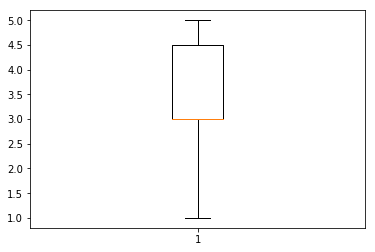

In [20]:
plt.boxplot(data[types[0]][successful])